## Final Project Submission

Please fill out:
* Student name: 
    #### - Jubilant Mutuku 
    #### - Esther Nyawera 
    #### - Miriam Nguru 
    #### - Yusra Mohamed 
    #### - Ian Kedeyie 
    #### - Abdideq Adan 


* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Predicting King County House Prices with Multiple Linear Regression

# 1. Problem Description
The aim of this project is to develop a Multiple Linear Regression Model to accurately predict the sale prices of houses in King County. Through careful data analysis and exploratory data analysis techniques, we will preprocess and clean the dataset to create a data frame for regression modeling. By analyzing key features such as square footage, number of bedrooms, location(waterfront or not), and more, we aim to uncover valuable insights that influence house prices.

# 2. Business Objective
Business understanding is essential for a real estate agency to effectively serve its clients.It serves as the foundation for successful operations and sustainable growth in the real estate industry.You need to understand the listing prices and how it affects buyers and sellers in making informed decisions. Identifying the expectations, preferences and needs of the clients, knowing what the clients want from the agency’s services especially in terms of property evaluation is crucial. Factors considered in evaluation are: I. Size and layout, the size of the property, the number of bedrooms and bathrooms and the layout is crucial. II. Condition, the property’s condition, including any need of repairs or renovations can affect its value. III. Location: The property location influences its value, factors like proximity to school, parks, shopping malls and transportation can impact the value Gaining insight into the local housing market dynamics in the dataset such as the fluctuations in supply and demand, seasonality, and regional variations in property value is important .



In [436]:
# importing all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## **Step 1: Reading and Understanding the Data**
Let's start with the following steps:

    - Importing data using the pandas library
    - Understanding the structure of the data

In [437]:
# Reading data
df = pd.read_csv("./data/kc_house_data.csv")

df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [438]:
df.shape

(21597, 21)

In [439]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [441]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [442]:
df = df[df['sqft_basement'] != '?']

df['sqft_basement'] = df['sqft_basement'].astype(float)


In [443]:
df['sqft_basement'].dtype

dtype('float64')

## **Step 2 : Data Cleaning and Preparation**

In [444]:
# # Removing recommended columns
# df.drop(["date","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1, inplace=True)
# df

In [445]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [446]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [447]:
df.dropna(inplace=True)

In [448]:
new_waterfront = {
    "NO":0,
    "YES":1
}
# df['waterfront'].str.replace(new_Waterfront)
new_cond = {
    'Very Good':5,
    'Average':4,
    'Good':3,
    'Poor':2,
    'Fair':1
}

new_grade = {
    '3 Poor':1,
    '4 Low':2,
    '5 Fair':3,
    '6 Low Average':4,
    '7 Average':5,
    '8 Good':6,
    '9 Better':7,
    '10 Very Good':8,
    '11 Excellent':9,
    '12 Luxury':10,
    '13 Mansion':11
}
new_view = {
    'NONE':0,
    'GOOD':2, 
    'EXCELLENT':4, 
    'AVERAGE':3, 
    'FAIR':1
}
df['waterfront'] = df['waterfront'].replace(new_waterfront)
df['condition'] = df['condition'].replace(new_cond)
df['grade'] = df['grade'].replace(new_grade)
df['view'] = df['view'].replace(new_view)

df

id        date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
...           ...         ...        ...       ...        ...          ...   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1          7242     2.0           0     0  ...      5        2170   
3          5000     1.0           0     0  ...      5        1050   
4          8080     1.0           0     0  ...      6        1680   
5        101930     1.0           0     0  ...      9        3890   
8          7470     1.0           0     0  ...      5        1050   
...         ...     ...         ...   ...  ...    ...         ...   
21591      1294     2.0           0     0  ...      6        1180   
21592      1131     3.0           0     0  ...      6        1530   
21593      5813     2.0           0     0  ...      6        2310   
21594      1350     2.0           0     0  ...      5        1020   
21596      1076     2.0           0     0  ...      5        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1              400.0      1951        1991.0    98125  47.7210 -122.319   
3              910.0      1965           0.0    98136  47.5208 -122.393   
4                0.0      1987           0.0    98074  47.6168 -122.045   
5             1530.0      2001           0.0    98053  47.6561 -122.005   
8              730.0      1960           0.0    98146  47.5123 -122.337   
...              ...       ...           ...      ...      ...      ...   
21591          130.0      2008           0.0    98116  47.5773 -122.409   
21592            0.0      2009           0.0    98103  47.6993 -122.346   
21593            0.0      2014           0.0    98146  47.5107 -122.362   
21594            0.0      2009           0.0    98144  47.5944 -122.299   
21596            0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
1               1690        7639  
3               1360        5000  
4               1800        7503  
5               4760      101930  
8               1780        8113  
...              ...         ...  
21591           1330        1265  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21596           1020        1357  

[15429 rows x 21 columns]

In [449]:
df = df.copy()
df.drop(["date","zipcode","lat","long"], axis=1, inplace=True)

correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price']
correlation_with_price


id              -0.014954
price            1.000000
bedrooms         0.305792
bathrooms        0.525655
sqft_living      0.706498
sqft_lot         0.084687
floors           0.260143
waterfront       0.275718
view             0.375165
condition        0.073081
grade            0.664356
sqft_above       0.612374
sqft_basement    0.320053
yr_built         0.050528
yr_renovated     0.120981
sqft_living15    0.583400
sqft_lot15       0.080569
Name: price, dtype: float64

In [450]:
df = df[df['bedrooms'] != 33]
df

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1      6414100192   538000.0         3       2.25         2570      7242   
3      2487200875   604000.0         4       3.00         1960      5000   
4      1954400510   510000.0         3       2.00         1680      8080   
5      7237550310  1230000.0         4       4.50         5420    101930   
8      2414600126   229500.0         3       1.00         1780      7470   
...           ...        ...       ...        ...          ...       ...   
21591  2997800021   475000.0         3       2.50         1310      1294   
21592   263000018   360000.0         3       2.50         1530      1131   
21593  6600060120   400000.0         4       2.50         2310      5813   
21594  1523300141   402101.0         2       0.75         1020      1350   
21596  1523300157   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1         2.0           0     0          4      5        2170          400.0   
3         1.0           0     0          5      5        1050          910.0   
4         1.0           0     0          4      6        1680            0.0   
5         1.0           0     0          4      9        3890         1530.0   
8         1.0           0     0          4      5        1050          730.0   
...       ...         ...   ...        ...    ...         ...            ...   
21591     2.0           0     0          4      6        1180          130.0   
21592     3.0           0     0          4      6        1530            0.0   
21593     2.0           0     0          4      6        2310            0.0   
21594     2.0           0     0          4      5        1020            0.0   
21596     2.0           0     0          4      5        1020            0.0   

       yr_built  yr_renovated  sqft_living15  sqft_lot15  
1          1951        1991.0           1690        7639  
3          1965           0.0           1360        5000  
4          1987           0.0           1800        7503  
5          2001           0.0           4760      101930  
8          1960           0.0           1780        8113  
...         ...           ...            ...         ...  
21591      2008           0.0           1330        1265  
21592      2009           0.0           1530        1509  
21593      2014           0.0           1830        7200  
21594      2009           0.0           1020        2007  
21596      2008           0.0           1020        1357  

[15428 rows x 17 columns]

In [451]:
df = df.drop_duplicates()

In [452]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.542600e+04  1.542600e+04  15426.000000  15426.000000  15426.000000   
mean   4.593593e+09  5.414877e+05      3.376896      2.121483   2085.542915   
std    2.874798e+09  3.730572e+05      0.903325      0.767084    919.628798   
min    1.000102e+06  8.200000e+04      1.000000      0.500000    370.000000   
25%    2.125570e+09  3.200000e+05      3.000000      1.750000   1430.000000   
50%    3.905082e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.334501e+09  6.438375e+05      4.000000      2.500000   2550.000000   
max    9.895000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.542600e+04  15426.000000  15426.000000  15426.000000  15426.000000   
mean   1.528821e+04      1.494522      0.007520      0.250097      3.790289   
std    4.200119e+04      0.538910      0.086393      0.820607      0.613758   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.050000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      4.000000   
75%    1.072000e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  15426.000000  15426.000000   15426.000000  15426.000000  15426.000000   
mean       5.664138   1793.712434     291.830481   1971.127706     81.782445   
std        1.173807    829.213319     443.390744     29.287576    395.705517   
min        1.000000    370.000000       0.000000   1900.000000      0.000000   
25%        5.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        5.000000   1570.000000       0.000000   1975.000000      0.000000   
75%        6.000000   2220.000000     560.000000   1997.000000      0.000000   
max       11.000000   9410.000000    4820.000000   2015.000000   2015.000000   

       sqft_living15     sqft_lot15  
count   15426.000000   15426.000000  
mean     1990.957539   12863.760793  
std       684.837335   27786.018115  
min       399.000000     659.000000  
25%      1490.000000    5100.000000  
50%      1850.000000    7626.000000  
75%      2370.000000   10108.750000  
max      6210.000000  871200.000000

In [453]:
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.items():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

133

In [454]:
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3 

for idx, row in df['bedrooms'].T.items():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

30

## **step 3: Visualization**

* Price spreed and Distribution
* Vitualizing categorical data
  - Waterfront	
  - condition	
  - grade
  - bedrooms
* Vitualizing numerical data


## 3.1 Price spread and Distribution

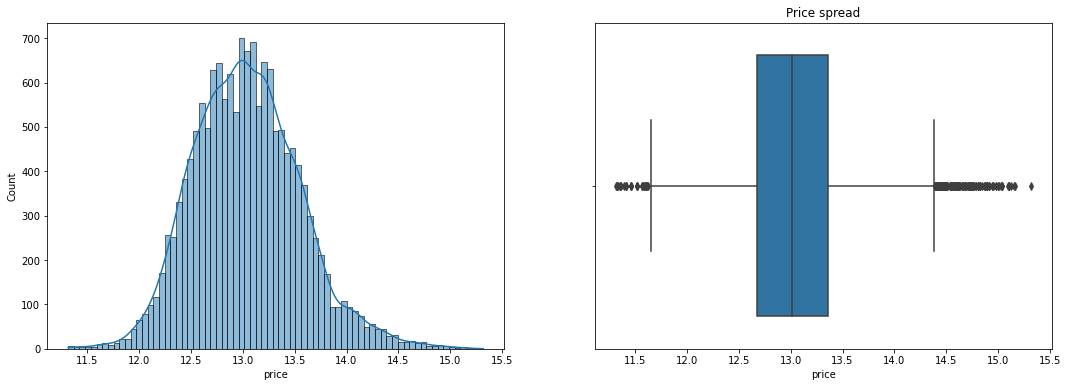

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

plt.title("Price distribution")
sns.histplot(df.price, kde=True, ax=ax1)

plt.title("Price spread")
sns.boxplot(x=df['price'], ax=ax2)
plt.show()


### Inference
* The plot right-skewed, meaning that the most prices in the dataset are low than 1.
* There is a slight difference between the mean and the median of the price distribution.

### 3.2 Vitualizing categorical data

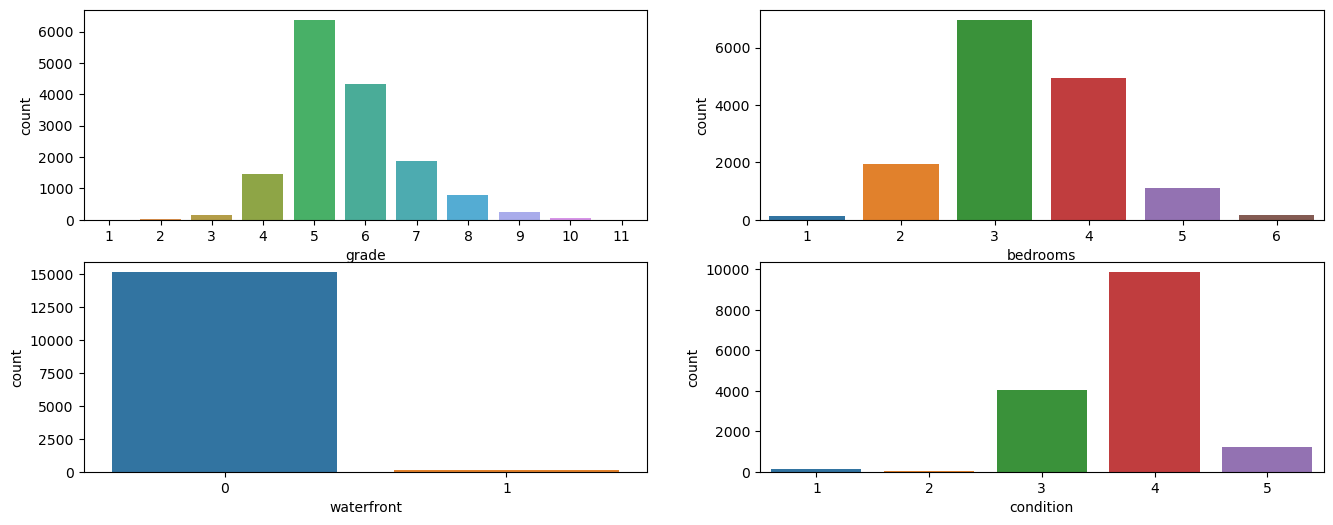

In [456]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6))

sns.countplot(x='grade', data=df, ax=axes[0, 0])
sns.countplot(x='bedrooms', data=df, ax=axes[0, 1])
sns.countplot(x='waterfront', data=df, ax=axes[1, 0])
sns.countplot(x='condition', data=df, ax=axes[1, 1])

plt.show()

<Axes: xlabel='yr_renovated', ylabel='count'>

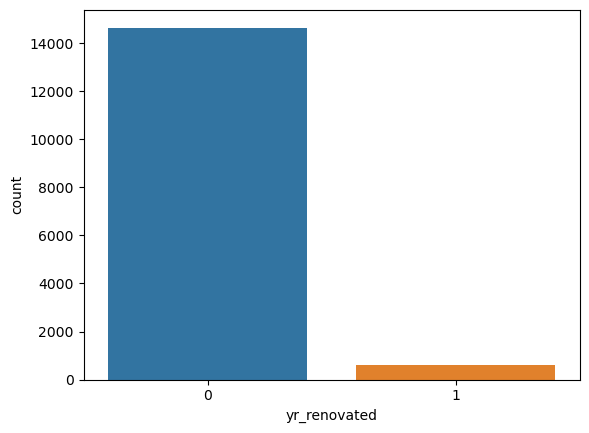

In [457]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Display unique values after the update
sns.countplot(x=df['yr_renovated'])

### **Inference**
* The majority of houses in the dataset do not have a waterfront view.
* Houses with an average condition are the most prevalent.
* The most common house configuration includes 3 bedrooms.
* The predominant grade for houses is 5, indicating a fair quality level.
* Most houses also are not renovated

In [458]:
high_corr_features = correlation_with_price[correlation_with_price.abs() > 0.5]

# Create a DataFrame with feature names and their correlation values
high_corr_df = pd.DataFrame({'Feature': high_corr_features.index, 'Correlation': high_corr_features.values})

# Display the DataFrame
high_corr_df

Feature  Correlation
0          price     1.000000
1      bathrooms     0.525655
2    sqft_living     0.706498
3          grade     0.664356
4     sqft_above     0.612374
5  sqft_living15     0.583400

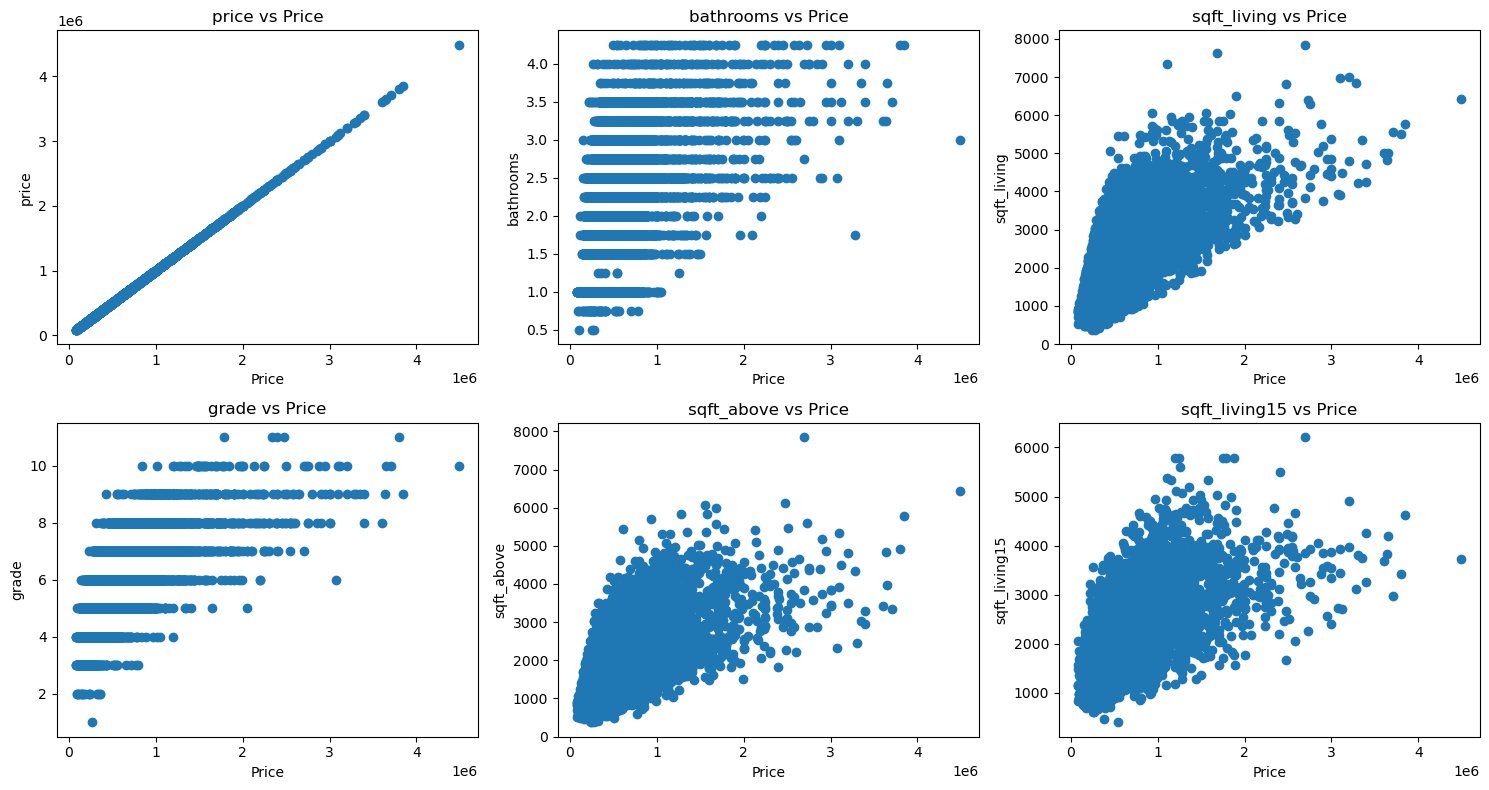

In [459]:
high_corr_price = df[['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for index, column in enumerate(high_corr_price.columns):  # Exclude 'price'
    row_index = index // 3
    col_index = index % 3
    
    axes[row_index, col_index].scatter(high_corr_price['price'], high_corr_price[column])
    axes[row_index, col_index].set_title(f'{column} vs Price')
    axes[row_index, col_index].set_xlabel('Price')
    axes[row_index, col_index].set_ylabel(column)

plt.tight_layout()
plt.show()

### Inference
* Based on the analysis of the provided dataset and visualizations:

#### Average Correlation:

* Bathrooms, bedrooms, sqf_above, sqf_living15, and grade show an average correlation with the price of the houses. These features have moderate relationships with the target variable.
* 
### Strong Correlation:

* Sqft_living exhibits a strong positive correlation with the price. The square footage of living space is positively associated with the house prices in the dataset.

#### Multicollinearity
* Considering the presence of multicollinearity between 'sqft_above' and 'sqft_living', and recognizing that 'sqft_living' exhibits the highest correlation with our target variable, we have decided to drop the 'sqft_above' feature to mitigate the effects of multicollinearity in our analysis."

# 4. Exploratory Data Analysis

# 4.1 Univariate analysis 

In [460]:
#univariate analysis for price 
df["price"].describe()

count    1.526300e+04
mean     5.299114e+05
std      3.320222e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.352250e+05
max      4.490000e+06
Name: price, dtype: float64

From the analysis above we can conclude that the dataset contains a diverse range of house prices, with a minimum price of $78,000 and a maximum price of $7,700,000.

The mean and median prices are relatively close, which suggests that the distribution of prices may be roughly symmetric. However, the high standard deviation indicates that there is considerable variability in prices, and the distribution might be right-skewed due to a few extremely high-priced houses.

The interquartile range (the difference between the 25th and 75th percentiles) is from approximately $322,000 to $645,000, indicating that the middle 50% of houses in the dataset falls within this price range.


In [461]:
#univariate analysis for grade feature
df['grade'].value_counts().to_frame()


count
grade       
5       6379
6       4314
7       1857
4       1454
8        783
9        245
3        161
10        48
2         16
11         5
1          1

The 'grade' feature's distribution reflects the quality and overall grade of houses in the dataset, which can be an important factor influencing their prices.  The grades are represented by numerical values with 1 being the most poorest and 11 being a mansion.Grade 5 is the most frequent, suggesting that many houses are of average quality.
Only one house falls into the lowest grade category, grade 1.
The distribution of grades provides insights into the quality and desirability of houses in the dataset, with the majority falling within the average to slightly above-average range.  

In [462]:
#univariate analysis for condition feature
df['condition'].value_counts().to_frame()

count
condition       
4           9877
3           4024
5           1217
1            127
2             18

This analysis provides an overview of the distribution of houses based on their condition. The majority of houses fall into Condition 4, which suggests that a significant portion of the houses in the dataset are in "average" condition. Condition 3 also represents a substantial number of houses, indicating that many are in "average" or "good" condition.

On the other hand, there are a smaller number of houses in Conditions 5, 1, and 2. These conditions may represent houses in "very good," "poor," or "fair" conditions, respectively.

It's essential to consider the condition of the house as it can significantly impact its price and other characteristics

# 4.2 Bivariate analysis

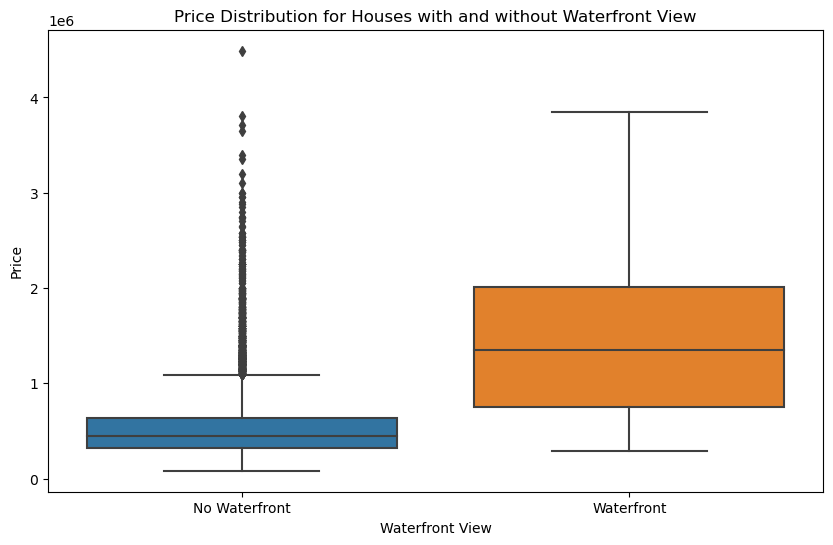

In [463]:
#bivariate analysis


# Create a boxplot to compare prices for houses with and without a waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution for Houses with and without Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])
# Show the plot
plt.show()


From the analysis above, we can draw the following conclusions:

Houses with a waterfront view tend to have a wider price distribution compared to houses without a waterfront view. This is evident from the larger spread of prices in the boxplot for waterfront houses.
Houses with a waterfront view generally have a higher upper quartile (75th percentile) price range compared to houses without a waterfront view, as indicated by the upper end of the box in the boxplot.

Houses without a waterfront view have a higher concentration of prices in the lower quartile (25th percentile) range, suggesting that they are generally more affordable than waterfront houses.

# 4.3 Multivariate analysis

In [464]:
#multivariate analysis
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price

corr = df.corr()['price'].sort_values().to_frame()
corr

price
id            -0.014395
yr_built       0.046824
condition      0.074260
sqft_lot15     0.077021
sqft_lot       0.079931
yr_renovated   0.118911
waterfront     0.246930
floors         0.261289
sqft_basement  0.292788
bedrooms       0.299660
view           0.362687
bathrooms      0.489492
sqft_above     0.585081
sqft_living15  0.593972
grade          0.668122
sqft_living    0.682373
price          1.000000

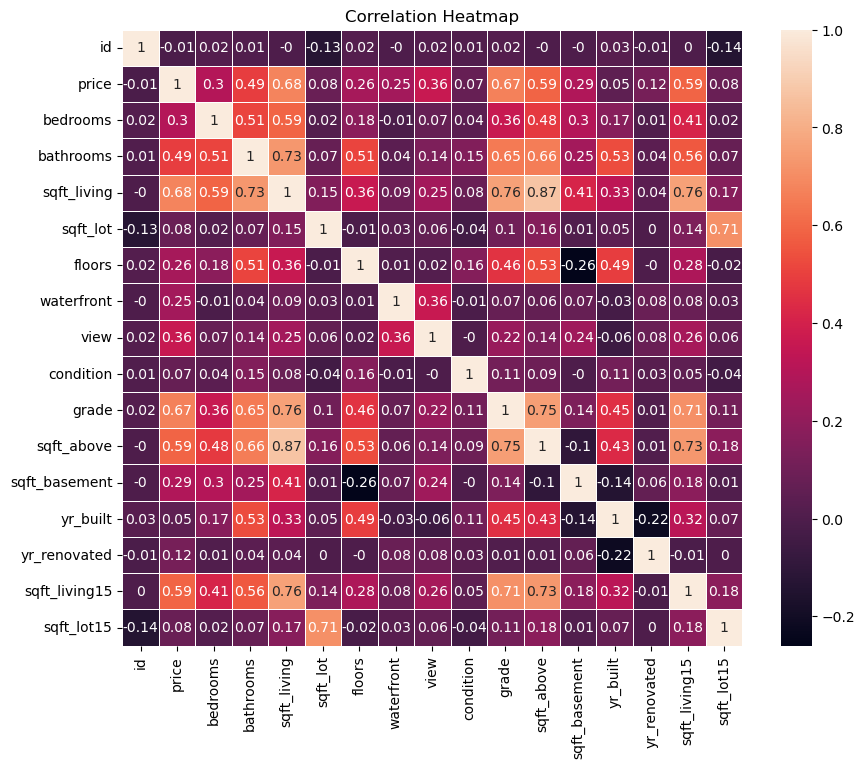

In [465]:
# Calculate the correlations
correlations = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(round(correlations, 2), annot=True, linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()


This analysis helps us understand which features are more strongly associated with the price of a house. It suggests that features related to the size, quality, and specific amenities of a house, such as sqft_living, grade, and waterfront view, have a significant impact on the house's price.

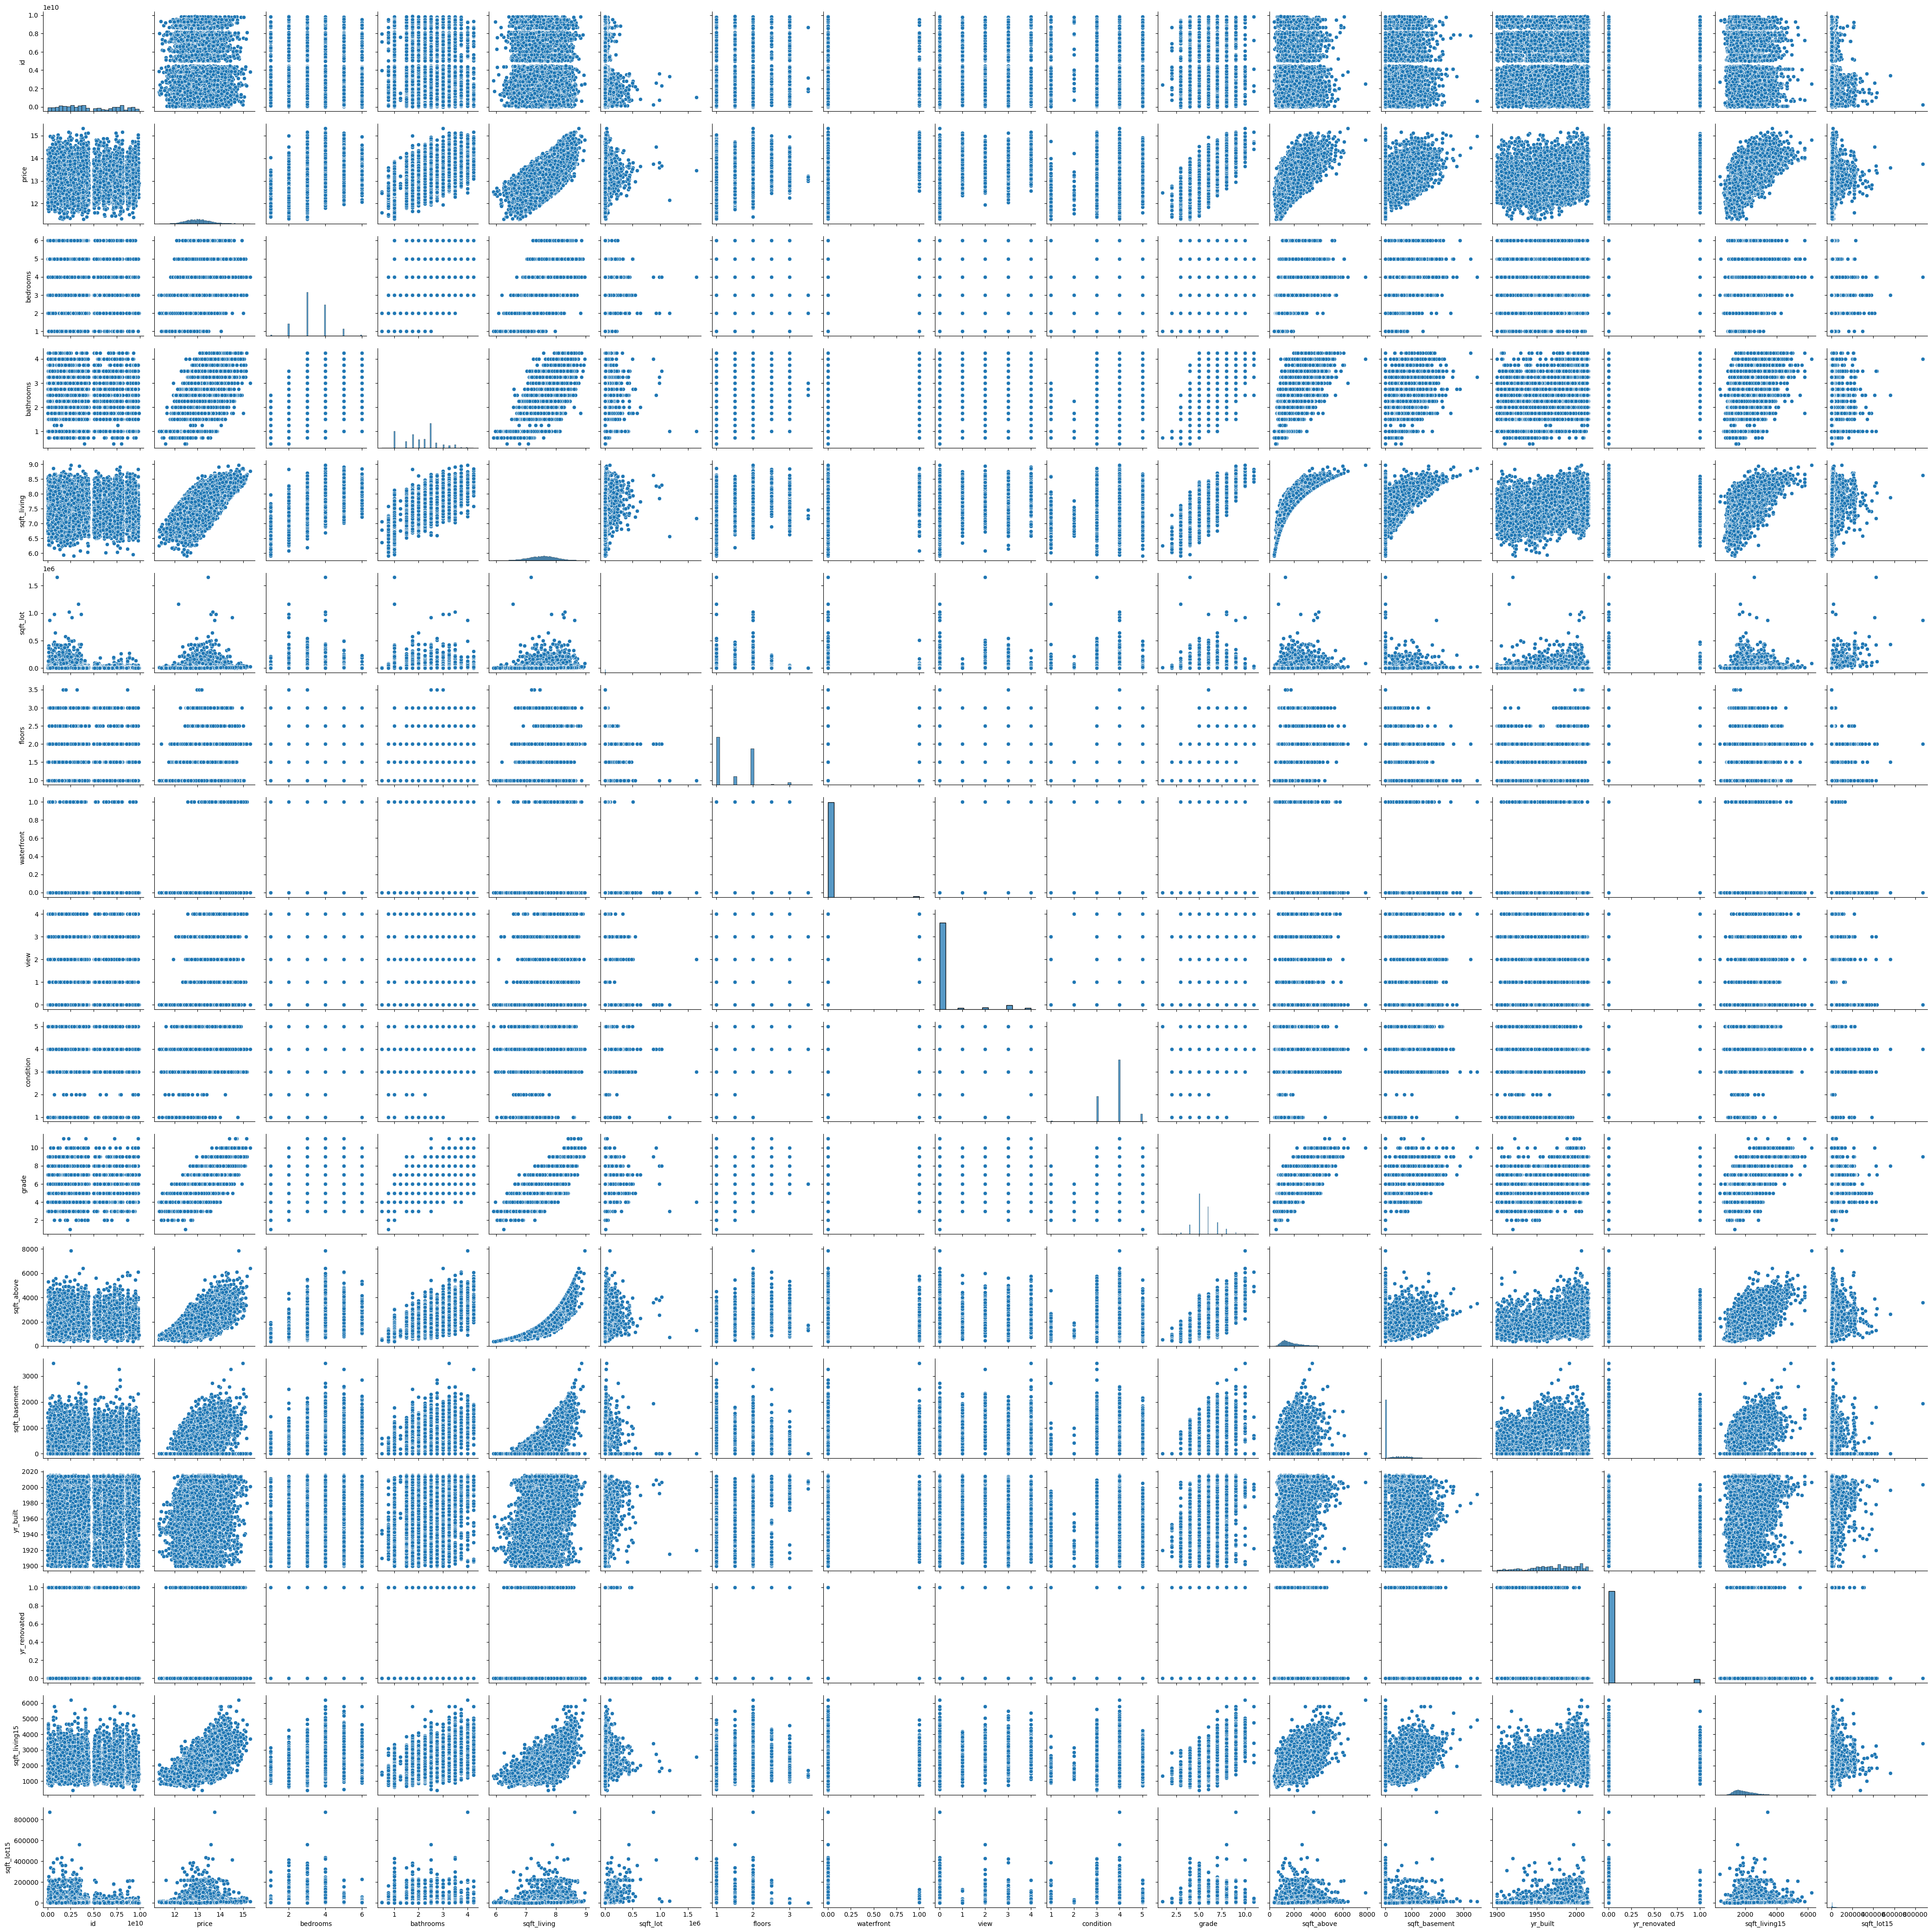

In [488]:
sns.pairplot(df)
plt.show()

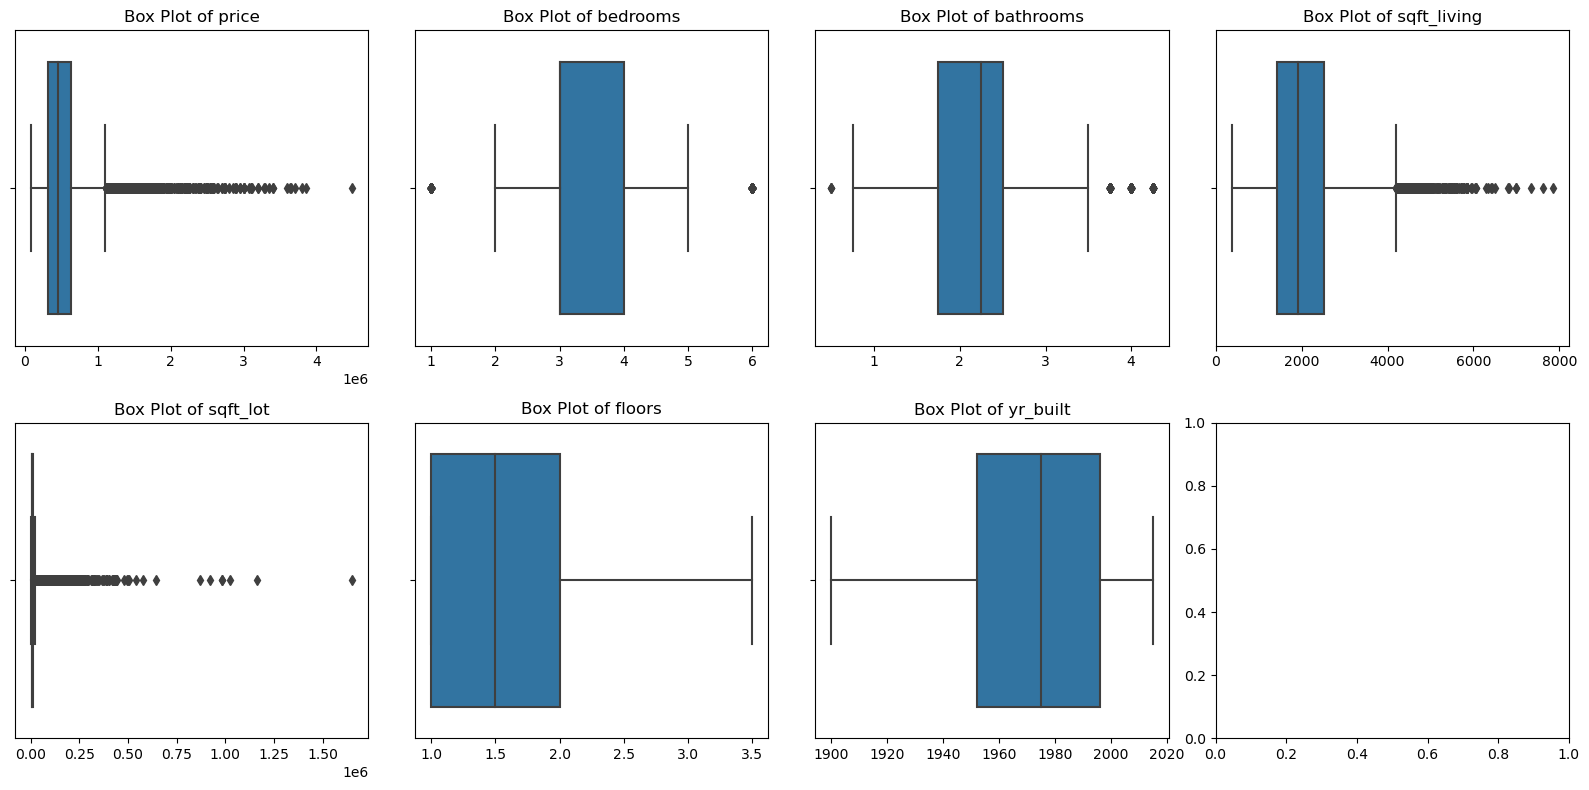

In [467]:
# Create a figure and a set of subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Specify the numerical columns for which you want to create box plots
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

# Loop through the columns and create box plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Box Plot of {col}')
    axes[i//4, i%4].set_xlabel('')  # Remove x-axis label for better readability

# Adjust the layout
plt.tight_layout()
plt.show()


# 5.1 Modeling

### **5.1.1 Model 1 - linear regresstion**
* In constructing our model, we will integrate the four key variables exhibiting the highest correlations with price. This approach ensures compliance with the multicollinearity assumption, safeguarding the stability and interpretability of the model.

In [478]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])


In [49]:
#Linear regression model_1 predicting the price based on the variable with the highest correlation value
y = df['price']

model_1 = "price ~ sqft_living"

formula = smf.ols(model_1, data=df).fit()
formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:13:10   Log-Likelihood:                -7098.9
No. Observations:               15263   AIC:                         1.420e+04
Df Residuals:                   15261   BIC:                         1.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8513      0.057    120.621      0.000       6.740       6.963
sqft_living     0.8202      0.008    109.100      0.000       0.805       0.835
==============================================================================
Omnibus:                       93.234   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.023
Skew:                           0.126   Prob(JB):                     2.55e-18
Kurtosis:                       2.748   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Inference**
* The R-squared value of 0.438 suggests that approximately 44% of the variation in the price can be explained by the model relative to its mean.

* Regarding the p-values, they all round to 0, indicating that the null hypothesis can be rejected for each predictor in the model.

### **5.1.2 Model_2 multiple linear regression with features strongly correlating price**

In [471]:
# Multiple linear regression incorporating the top four variables showing the strongest correlations with price
X = 'price ~ bathrooms + sqft_living + grade+ sqft_living15'
model_1 = smf.ols(X, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4215.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:28:27   Log-Likelihood:            -2.1001e+05
No. Observations:               15263   AIC:                         4.200e+05
Df Residuals:                   15258   BIC:                         4.201e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.664e+05   1.02e+04    -36.096      0.000   -3.86e+05   -3.47e+05
bathrooms     -4.454e+04   3869.125    -11.513      0.000   -5.21e+04    -3.7e+04
sqft_living     166.6042      4.231     39.376      0.000     158.311     174.898
grade          1.035e+05   2686.067     38.547      0.000    9.83e+04    1.09e+05
sqft_living15    31.7383      4.499      7.055      0.000      22.920      40.557
==============================================================================
Omnibus:                     8781.630   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156871.973
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      17.952   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **5.1.2.1  Multicollinearity**
* We have set a liberal multicollinearity cutoff at 0.80. To further mitigate multicollinearity in the second model, we will consider features with correlations of 0.75 or above.
* Although there is still some multicollinearity between sqft_living and grade, the removal of sqft_living15 has mitigated this problem.

In [487]:
corr = df.corr().abs()

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

Correlations                   Features
2      0.828102  [sqft_living, sqft_above]
4      0.828102  [sqft_above, sqft_living]
0      0.751598   [bathrooms, sqft_living]
1      0.751598   [sqft_living, bathrooms]
3      0.750080        [grade, sqft_above]
5      0.750080        [sqft_above, grade]

### **5.1.2.2 Model_3 multiple linear regression with features strongly correlating price without multicollinearity**

In [481]:
X =  "price ~ grade + bathrooms + sqft_living"

model_3 = smf.ols(X, data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     5711.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:33:58   Log-Likelihood:                -5754.3
No. Observations:               15263   AIC:                         1.152e+04
Df Residuals:                   15259   BIC:                         1.155e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.6102      0.074    115.640      0.000       8.464       8.756
grade           0.2027      0.004     53.624      0.000       0.195       0.210
bathrooms      -0.0269      0.006     -4.370      0.000      -0.039      -0.015
sqft_living     0.4429      0.012     37.000      0.000       0.419       0.466
==============================================================================
Omnibus:                       60.842   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.826
Skew:                           0.146   Prob(JB):                     6.19e-14
Kurtosis:                       2.900   Cond. No.                         258.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **5.1.3 Residuals Normality Assumption**


<Figure size 1200x800 with 0 Axes>

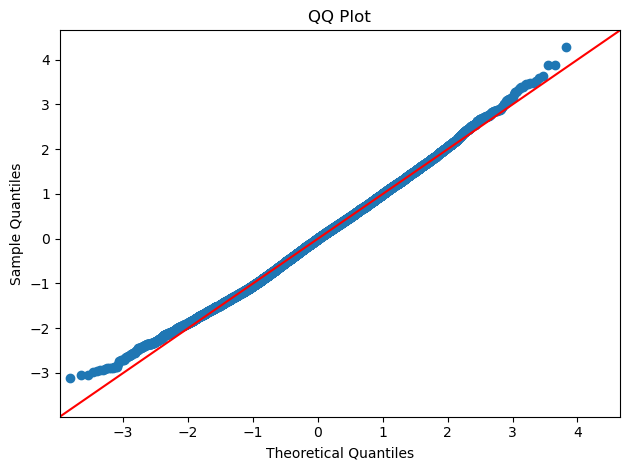

In [482]:

plt.figure(figsize=(12, 8))

fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()


* In this step, we confirm the normality of the model's residuals using a QQ-plot, verifying their alignment along a straight line. This ensures that the residuals adhere to a normal distribution, a crucial assumption in multiple linear regression analysis.

Text(0.5, 0.99, 'Residuals Scatterplot')

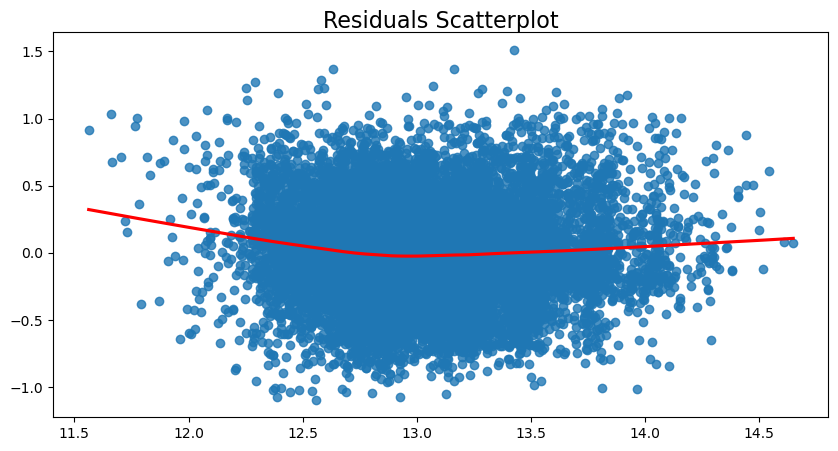

In [484]:
plt.figure(figsize=(10,5))
sns.regplot(x=model_3.predict(), y=model_3.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

## 5.2 Model 
### 5.2.1 Model Validation with Random Forest and Linear Regression
To assess the model's performance, cross-validation is employed as a crucial step. Utilizing sklearn's train_test_split function, the dataset is divided into training and testing subsets. The default split allocates 75% for training and 25% for testing. The model is trained on one subset and tested on another, and the mean squared error is computed using both Random Forest and Linear Regression for evaluation."
## 5.2.2 Training model with linear regression
  

In [491]:
from sklearn.metrics import mean_squared_error, r2_score

def linear_model(dataframe):
    # Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    # Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    
    # Evaluate the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print('Mean Squared Error Train:', round(mse_train, 2))
    print('Mean Squared Error Test:', round(mse_test, 2))
    print('R-Squared Train:', round(r2_train, 2))
    print('R-Squared Test:', round(r2_test, 2))

    return model

model = linear_model(df)

Mean Squared Error Train: 0.09
Mean Squared Error Test: 0.1
R-Squared Train: 0.64
R-Squared Test: 0.63


* The linear regression model exhibits low training and test MSE values, signifying accurate predictions. High R-squared scores on both sets indicate the model effectively explains the variance in the data, emphasizing its strong predictive performance.

## 5.2.3 Training model with random forest


In [492]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_model(dataframe):
    '''Build Random Forest regression model and print evaluation metrics.'''
    # Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    # Fit the Random Forest model
    rf_model = RandomForestRegressor(random_state=123)
    rf_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print('Random Forest - Mean Squared Error Train:', round(mse_train, 2))
    print('Random Forest - Mean Squared Error Test:', round(mse_test, 2))
    print('Random Forest - R-Squared Train:', round(r2_train, 2))
    print('Random Forest - R-Squared Test:', round(r2_test, 2))

    return rf_model

# Build and evaluate Random Forest model
rf_model = random_forest_model(df)


Random Forest - Mean Squared Error Train: 0.01
Random Forest - Mean Squared Error Test: 0.08
Random Forest - R-Squared Train: 0.96
Random Forest - R-Squared Test: 0.71


* Training Set Mean Squared Error (MSE): 0.01, indicating the model's predictions closely match actual values.
* Test Set Mean Squared Error (MSE): 0.08, slightly higher but still reasonable, suggesting generalization to new data.
* Training Set R-Squared (R2): 0.96, signifying a high ability to explain variability in the training data.
* Test Set R-Squared (R2): 0.71, reflecting good but slightly reduced explanatory power on unseen data, indicating some degree of overfitting.

# 6.1 Recommendation and Conclusion

## 6.1.1 Recommendation

The King County dataset emphasizes houses with average "grade," "condition," and "bedrooms," leaving fewer records of exceptional properties. This led to the removal of outliers. However, a larger dataset is needed for a thorough analysis of these unique qualities.

## 6.1.2 Conclusions
In King County, square footage, grade, and bathrooms emerge as key predictors of a home's price. To enhance property value, homeowners should prioritize expanding square footage and improving construction quality. However, the model has limitations, such ahe need for log-transformed variables and potential regional applicability issues. Future analysis should investigate predictors for homes beyond King County and those with extreme price values.